# Atomic Experiments

Attempts to recreate:

http://nbviewer.jupyter.org/github/abidlabs/AtomsOfDeepLearning/blob/master/Atomic%20Experiments%20in%20Deep%20Learning.ipynb

The following experiments use [conx](http://conx.readthedocs.io/en/latest/) which "abstracts away" the truly non-important details, like plotting, but keeps all of the important meta-parameters in plain view.

## Experiment 1

Criticisms of original experiments:

* "abstracted away" has made exactly the relevant code hidden
* original showed mostly plotting code rather than code n notebook
* some key meta-parameters (such as batch size and activation function) not mentioned
* running original code often does give good results; never mentioned
* patterns in learning curves not mentioned

Other points:

* these versions seems to take about 2 times longer in real time (CPU only). Original was written in TensorFlow. This version is written in Conx on top of Keras on top of TensorFlow. This version also plots training results during learning.
* conx implements "early stopping" when accuracy is achieved


In [1]:
import conx as cx
import math

Using TensorFlow backend.
Conx, version 3.6.5


The functions we will attempt to learn:

In [2]:
def sin(x):
    return math.sin(12 * x)

def polynomial(x):
    return -2 * x ** 4 + x ** 3 + x ** 2 - 2 * x + 0

The matrix of parameters to vary, functions and hidden layer sizes:

In [3]:
functions = [abs, polynomial, sin]
n_hidden_units = [2, 4, 16] 

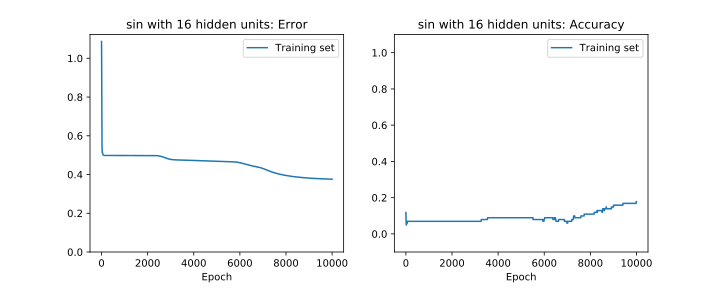

CPU times: user 2min, sys: 31.6 s, total: 2min 32s
Wall time: 1min 27s


In [4]:
%%time
results = []
for n in n_hidden_units:
    name = "%d hidden units" % (n,)
    net = cx.Network(name)
    net.add(cx.Layer("input", 1), 
            cx.Layer("hidden", n, activation="sigmoid"),
            cx.Layer("output", 1))
    net.connect()
    pics = [net.picture(format="image")]
    for function in functions:
        net.name = "%s with %d hidden units" % (function.__name__, n)
        net.compile(error="mse", optimizer="adam", lr=0.003) # lr = learning rate
        inputs = [[v] for v in cx.frange(-1, 1.02, .02)]
        targets = [[function(v[0])] for v in inputs]
        net.reset()
        net.dataset.load(inputs=inputs, targets=targets)
        net.train(10000, accuracy=1.0, tolerance=.1, 
                  batch_size=len(inputs), verbose=0, report_rate=1000, plot=True)
        outputs = [x[0] for x in [net.propagate(v) for v in inputs]]
        pics.append(cx.plot([["True", targets], ["Predicted", outputs]],
                            xs=[v[0] for v in inputs],
                            title="%s(x) with %d hidden unts" % (function.__name__, n),
                            format="image"))
    results.append(pics)

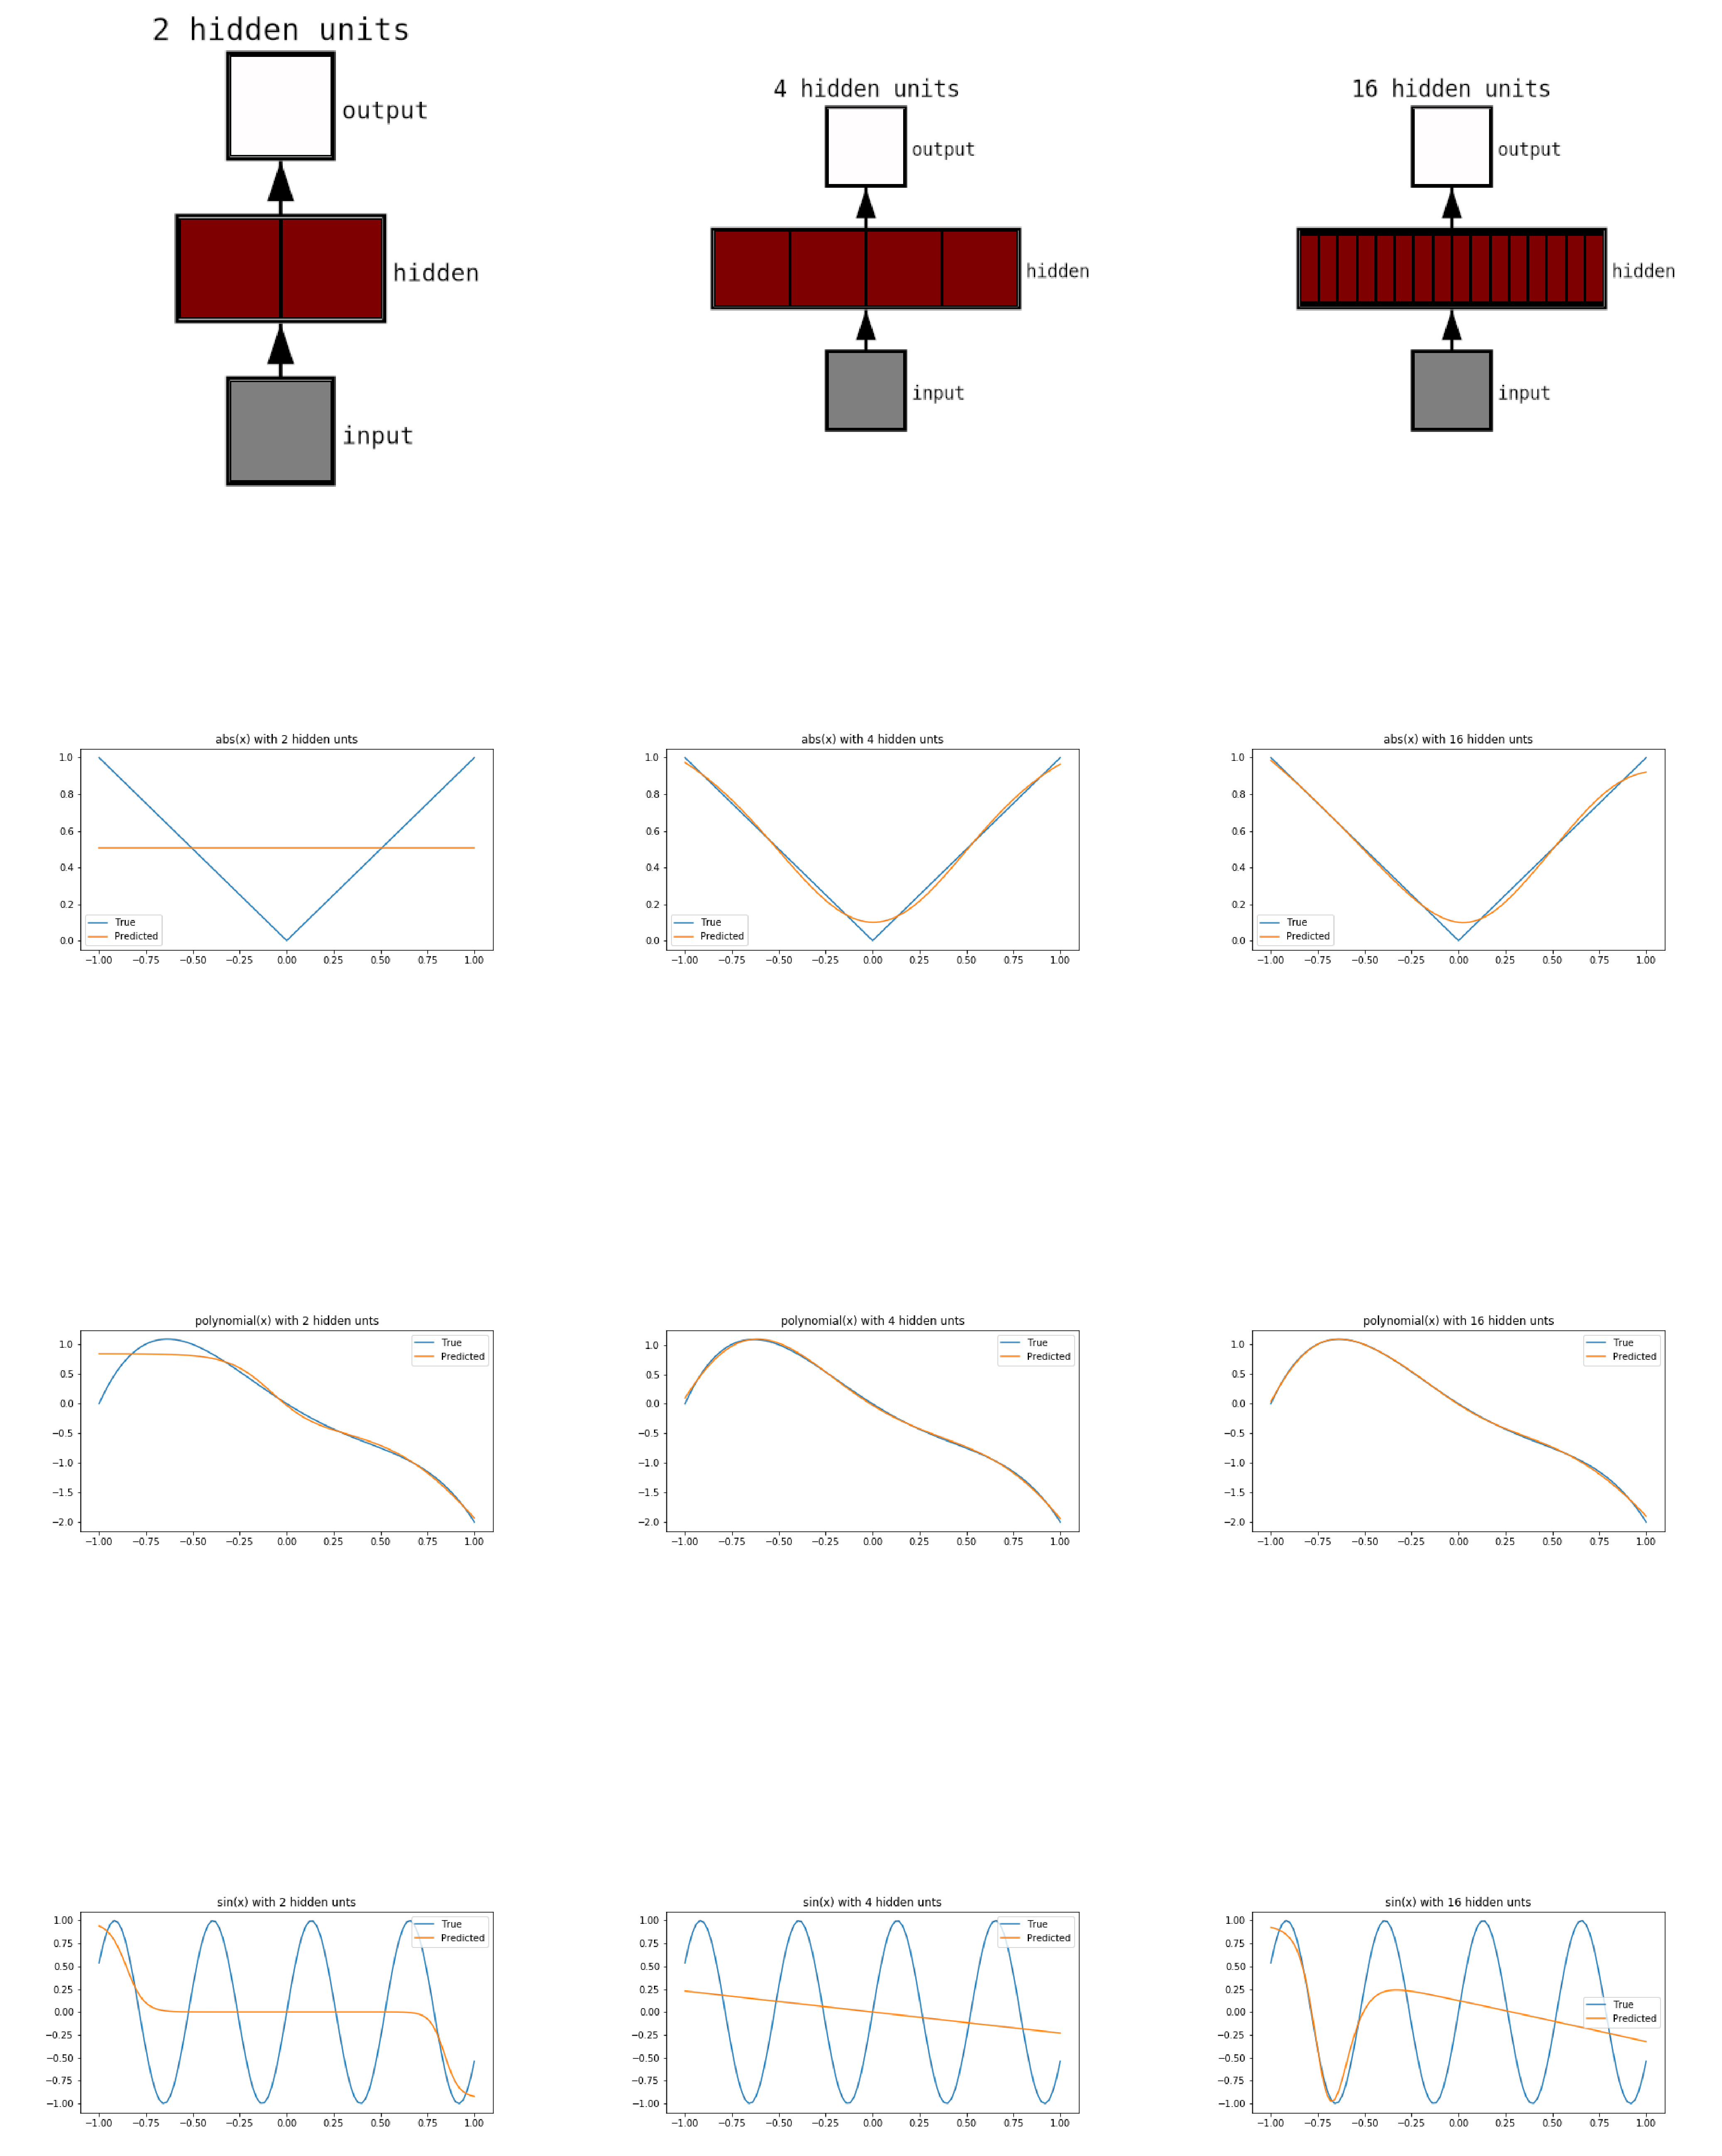

In [5]:
cx.view_image_list(results[0] + results[1] + results[2], 
                   layout=(3, None), pivot=True, scale=20.0)